## PROBABILITY AND STATISTICS

In this notebook, we study random phenomena using numerical simulations. The goal is to illustrate probabilistic concepts through simple experiments and to compare theoretical expectations with empirical results.

### Source

The problems and ideas explored in this notebook are inspired by educational materials from Sorbonne University: Programmation Python pour les mathématiques, Julien Guillod -- Sorbonne Université, used for teaching Python and applied mathematics. All implementations and analyses are my own.

## 1) Random sign harmonic series

The goal of this section is to simulate the convergence of a series with randomly selected signs. More precisely, if $(X_i)_{i \in \mathbb{N}}$ is a sequence of independent random variables that take the values $1$ or $-1$ with probability $\frac{1}{2}$, we define the following sum: $W_0 = 0$ and $W_n = \sum_{i=1}^n \frac{X_i}{i}$.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
def sign():
    """Simulate the random variable X_i"""
    a = np.random.binomial(1,0.5)
    if a == 1 :
        return 1
    else :
        return -1
    

In [212]:
def simulate(n):
    """Returns a sequence of outcomes W1,W2,...,W_n"""
    W = 0
    for i in range(1,n+1):
        W += sign()/i
    return W

Let's draw a graph about the function $n → W_n$ for $n \in [0,1000]$

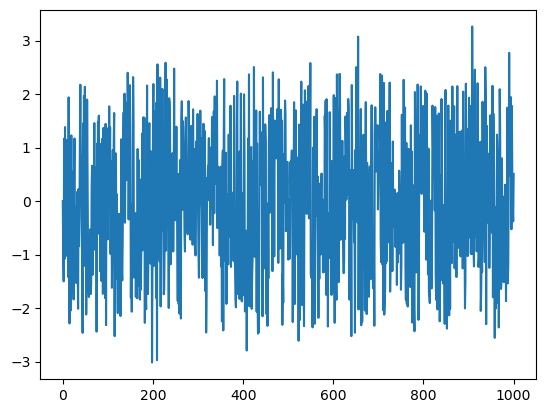

In [37]:
l = [0]
for i in range(1,1001):
    l.append(simulate(i))
Wn = np.array(l)
fig,ax = plt.subplots()
ax.plot( Wn)

    

At first sight , the sequence doesn't seem to converge. However it's almost always between -3 and 3.

(array([  49.,  408., 1154., 1518., 1607., 1666., 1626., 1327.,  548.,
          97.]),
 array([-3.41684374, -2.74774525, -2.07864676, -1.40954827, -0.74044978,
        -0.07135129,  0.59774719,  1.26684568,  1.93594417,  2.60504266,
         3.27414115]),
 <BarContainer object of 10 artists>)

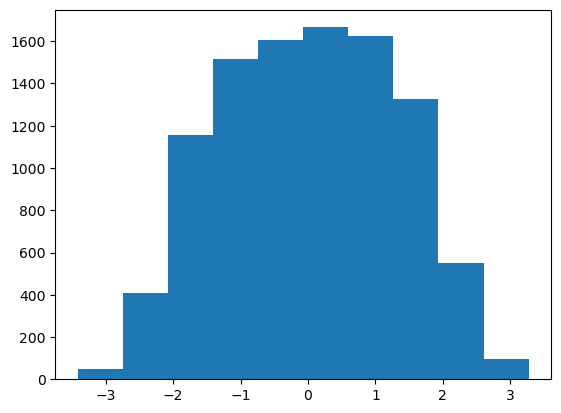

In [38]:
l2 = []
for i in range(10000):
    l2.append(simulate(1000))
W1000 = np.array(l2)
fig,ax = plt.subplots()
ax.hist( W1000)


The histogram suggests that the variable $W_{1000}$ follows a normal distribution centered at 0. Since almost all of the observations are between $-3$ and $3$, the standard deviation must be approximately $1 = 3/3$. Therefore, a plausible distribution for this variable is $\mathcal{N}(0,1)$.

 ### 2) Benford's law



The Benford's law predicts that in a list of numbers, the probability that a number starts with the digit 1 is greater than the probability that it starts with the digit 9.

More precisely, the probability that a number starts with the digit $d$ is:
$$\log_{10}\left(1 + \frac{1}{d}\right)$$

![Benford's law distribution of digits](Benfords-Law.png)



Let's write two functions that we will use later.

In [211]:
def first_digit(n) :
    """Returns the first digit of a number n"""
    return int(str(n)[0])
def occurences(liste):
    """Returns the list of occurences of digit as first digits of numbers in the given list"""
    l = [0]*9
    for e in liste:
        if e != 0: # We don't consider 0 as a first digit
            l[first_digit(e)-1]+=1
    return l

Let's see if the benford's law seems to hold with the sequence $(2^n)_{n \in N}$

(array([301., 176., 125.,  97.,  79.,  69.,  56.,  52.,  45.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

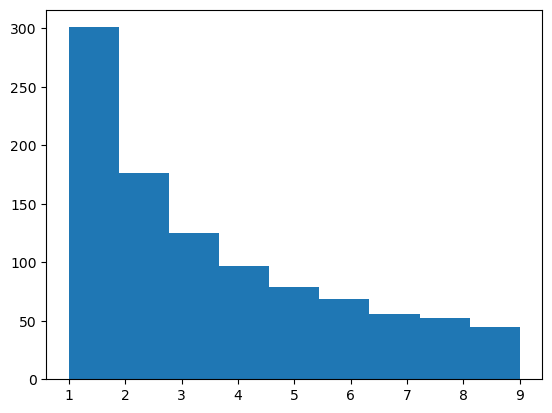

In [115]:
two_n = []
for i in range(1000):
    two_n.append(first_digit(2**i))
two_n = np.array(two_n)
fig , ax = plt.subplots()
ax.hist(two_n,bins=9)


The Benford's law seems pretty accurately obversed in this case.

Let's try with the sequence $(3n+1)_{n \in N}$

(array([373., 369.,  36.,  39.,  36.,  36.,  39.,  36.,  36.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

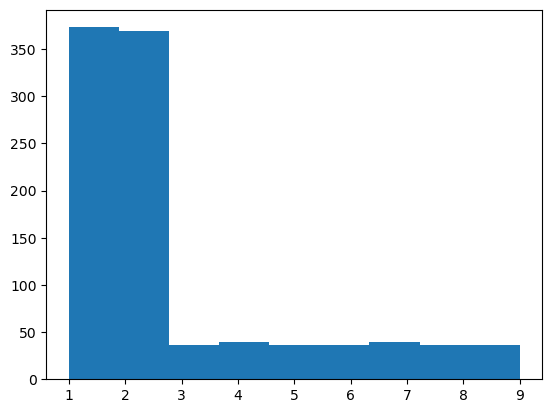

In [53]:
three_n_plus_one = []
for i in range(1000):
    three_n_plus_one.append(first_digit(3*i+1))
three_n_plus_one = np.array(three_n_plus_one)
fig , ax = plt.subplots()
ax.hist(three_n_plus_one,bins=9)


Unlike previously , the law doesn't seem to hold with the sequence $(3n+1)_{n \in N}$. 

Let's try with real data about the France population in 2018.

C:\Users\samue\AppData\Local\Temp\ipykernel_47872\3169112033.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BTT_TD_POP1A_2018.CSV', sep = ";")


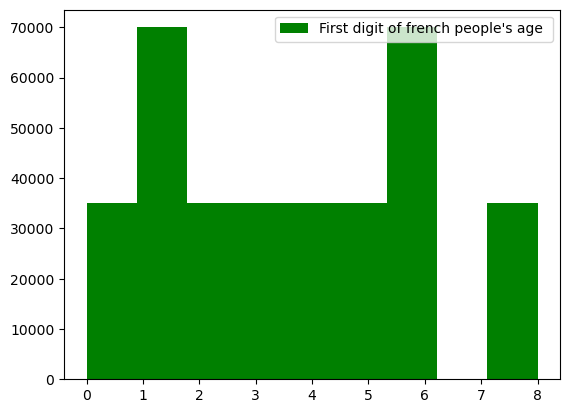

In [113]:
import pandas as pd

data = pd.read_csv('BTT_TD_POP1A_2018.CSV', sep = ";")
age= data['AGEPYR10']
digit=[]
for e in age_per_sex_M :
    digit.append(first_digit(e))
fig,ax = plt.subplots()
ax.hist(digit , bins = 9, color= 'green' , label = "First digit of french people's age ")
ax.legend()

We can see that the first digit of ages of French people doesn't follow Benford's law.

## Conclusion

Benford's law doesn't hold for all sequences of numbers. Many factors are required, such as: the values have to span several orders of magnitude, the data may follow a multiplicative trend, etc.

These conditions were satisfied with the sequence $(2^n)_{n \in \mathbb{N}}$ and we saw that Benford's law held.

However, the law wasn't observed with data about the ages of French people since human age is naturally bounded and hence does not span several orders of magnitude.

## 3) Gambler's ruin



The gambler's ruin problem illustrates how even a fair game can lead to eventual bankruptcy if the player has finite resources. The goal of this section is to simulate the evolution of a player's money when playing heads or tails.

At each toss of the coin, the player wins 1 euro if it is heads and loses 1 euro if it is tails. The probability of getting heads is denoted as $p$ and the probability of tails as $q$. In particular, we have $p = q = \frac{1}{2}$ if the game is fair.

Mathematically, the amount of money $S_i$ that the gambler has at step $i$ is given by:
$$S_i = 
\begin{cases} 
0, & \text{if } S_{i-1} = 0, \\
S_{i-1} + X_i, & \text{if } S_{i-1} \geq 1,
\end{cases}$$
where $(X_i)_{i \geq 0}$ are random variables described as follows: $P(X_i = 1) = p$ and $P(X_i = -1) = q$.

Let's write a function simulate(p, k, N) that generates a process of length $N$ starting with $S_0 = k$. In other words, the function returns a sequence $(S_0, S_1, S_2, \dots, S_N)$.

In [123]:
def simulate(p,k,N):
    """Returns a sequence (S0,S1,S2,...,SN)"""
    l = [k]
    S = k
    for i in range(N-1):
        if S == 0:
            l.append(0)
        else :
            a =  np.random.binomial(1,p)
            if a == 1 :
                S = S+1
            else :
                S = S-1
            l.append(S)
    return l 

            

Let's draw some graphs about the evolution of the player's money with some values of p (The probability to get a head and to win 1 euro)

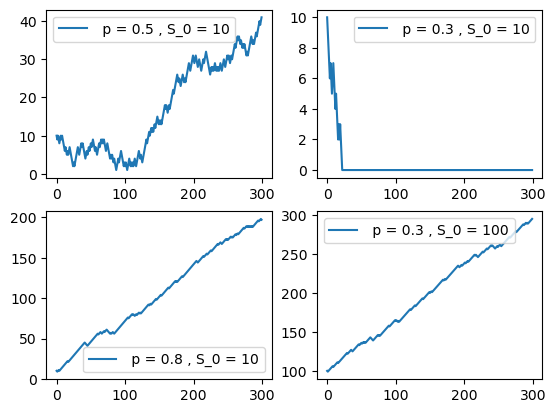

In [130]:
p_05 = np.array(simulate(0.5,10,300))
p_03 = np.array(simulate(0.3,10,300))
p_08 = np.array(simulate(0.8,10,300))
p_03_bis = np.array(simulate(0.8,100,300))
fig , ax = plt.subplots(2,2)
ax[0][0].plot(list(range(len(p_05))), p_05 , label = " p = 0.5 , S_0 = 10")
ax[0][1].plot(list(range(len(p_03))), p_03 , label = " p = 0.3 , S_0 = 10")
ax[1][0].plot(list(range(len(p_08))), p_08 , label = " p = 0.8 , S_0 = 10")
ax[1][1].plot(list(range(len(p_03_bis))), p_03_bis , label = " p = 0.3 , S_0 = 100")
ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()


Let us analyze these graphs. We simulated 300 trials for each scenario.

We observe that among players starting with $S_0 = 10$ euros, the player with winning probability $p = 0.8$ performed best, reaching approximately 200 euros after 300 trials, as expected in a favorable game. The player engaged in a fair game ($p = 0.5$) reached 40 euros but nearly lost all funds around the 100th trial. Conversely, the player with $p = 0.3$ quickly went bankrupt.

We also simulated a fourth player with a low winning probability ($p = 0.3$) but a substantially higher initial capital ($S_0 = 100$ euros). Despite having few chances to win individual trials, this player outperformed even the $p = 0.8$ player after 300 trials. This suggests that initial capital significantly influences long-term success.

Denoting $T$ as the stopping time (when $S_T = 0$ or $S_T = n$, where $n$ is the target amount), theoretical results state that the expected stopping time is:
$$
\mathbb{E}[T] = 
\begin{cases} 
k(n - k), & \text{if } p = q, \\[1em]
\dfrac{n}{p - q} \cdot \dfrac{1 - \rho^k}{1 - \rho^n} - \dfrac{k}{p - q}, & \text{if } p \neq q,
\end{cases}
$$
where $\rho = q/p$.

The probability of ruin (losing all money) is given by:
$$
\mathbb{P}(S_T = 0) = 
\begin{cases} 
\dfrac{n - k}{n}, & \text{if } p = q, \\[1em]
\dfrac{\rho^k - \rho^n}{1 - \rho^n}, & \text{if } p \neq q.
\end{cases}
$$

Our goal is to verify these results empirically, beginning with the fair game case ($p = q$).


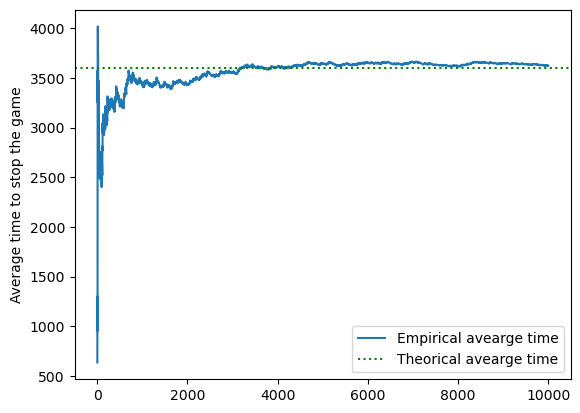

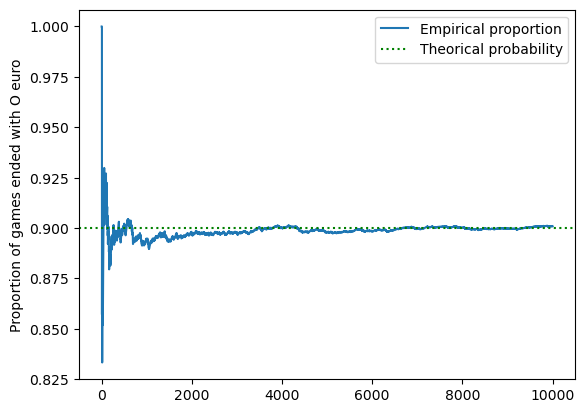

In [148]:
def time_to_stop(p,k, n) :
    """Return the time recquired to stop T and True/False depending on if you lost all your money"""
    t = 0
    S = k
    while S != 0 and S < n : 
        a = np.random.binomial(1,p)
        if a == 1:
            S = S + 1
        else :
            S = S - 1
        t+=1
    return t, S == 0
time_ = []
P_lose = []
for i in range(10000):
    t_,lost =   time_to_stop(0.5,20, 200)
    time_.append(t_)
    if lost :
        P_lose.append(1)
    else :
        P_lose.append(0)
        
time_ = np.cumsum(np.array(time_)) / np.arange(1, len(time_)+1)
P_lose = np.cumsum(np.array(P_lose)) / np.arange(1, len(P_lose)+1)

fig,ax = plt.subplots()
ax.plot(list(range(1, len(time_)+1)), time_ , label='Empirical avearge time')
ax.set_ylabel( "Average time to stop the game")
ax.axhline(y=20*(200-20), color='green', linestyle=':', label='Theorical avearge time')
ax.legend()

fig,ax = plt.subplots()
ax.plot(list(range(1, len(P_lose)+1)), P_lose, label='Empirical proportion')
ax.set_ylabel( "Proportion of games ended with O euro")
ax.axhline(y=(200-20)/200, color='green', linestyle=':', label='Theorical probability')
ax.legend()
    
    


We simulated 10,000 games where a player starting with 20 euros aims to reach 200 euros in a fair game ($p = 0.5$).

We observe that as the number of simulations increases, the empirical average stopping time converges to the theoretical expectation. Similarly, the empirical proportion of games ending in ruin (0 euros) converges to the theoretical probability. These observations validate our theoretical results.

Notably, even in a fair game, approximately 90\% of simulations ended with the player losing all their money.


## 4) Percolation 


The goal of this section is to study a percolation model. A percolation model is a mathematical model used to study the circulation of a fluid (water, etc.) through an environment containing holes and obstacles. We will model the environment using a random matrix of Boolean values indicating whether the fluid can pass through each location. We say that a matrix percolates if there exists a path from the top to the bottom.

Let us build the functions that we will use.


In [196]:
def generate(n,p):
    """ Generate a n*n matrix in which each value has probability of p to be True and 1-p to be False"""
    return np.random.binomial(1,1-p,size=(n,n))

In [197]:
def flow(isopen, isfull, i, j):
    if i+1 < len(isopen[:,0]) and isopen[i+1,j] == 0 and isfull[i+1,j] == 0  :
        isfull[i+1,j] = 1
        flow(isopen, isfull, i+1, j)
    if j+1 < len(isopen[0,:]) and isopen[i,j+1] == 0 and isfull[i,j+1] == 0:
        isfull[i,j+1] = 1
        flow(isopen, isfull, i, j+1)
    if 0 <= j-1 and isopen[i,j-1] == 0 and isfull[i,j-1] == 0:
        isfull[i,j-1] = 1
        flow(isopen, isfull, i, j-1)
    return isfull
def fill(isopen):
    isfull = np.zeros_like(isopen)
    for i in range(0, len(isopen [0,:]) - 1) :
        isfull = flow(isopen, isfull, 0, i)
    for t in range(0, len(isopen [0,:])):
        for s in range(0, len(isopen [:,0])) :
            if isfull[s,t] == 1:
                isopen[s,t] = 2
    return isopen 

Let us generate a percolation matrix of dimension $10 \times 10$, where each location has a probability of $0.5$ of being full. The black color corresponds to a full location and the white color corresponds to an empty one.

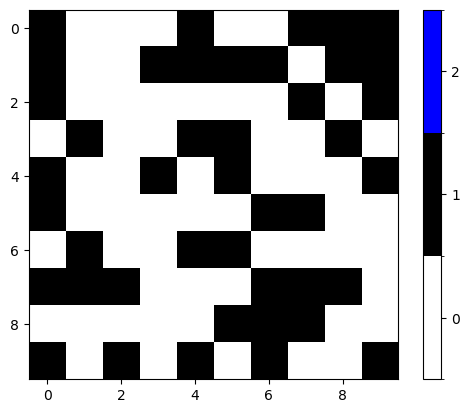

In [204]:
from matplotlib.colors import ListedColormap, BoundaryNorm
isopen = generate(10,0.5)

# 1) Définition des couleurs (ordre = indices)
cmap = ListedColormap(['white','black', 'blue'])

# 2) Définition des bornes entre les valeurs
#    0 | 1 | 2
bounds = [-0.5, 0.5, 1.5, 2.5]

# L'intervalle [-0.5, 0.5) correspond au blanc les deux autres au noir et au bleu

# 3) Normalisation par intervalles
norm = BoundaryNorm(bounds, cmap.N)

# 4) Affichage
plt.imshow(isopen, cmap=cmap, norm=norm, interpolation='none') # interpolation='none' → pixels nets (important pour une grille)

plt.colorbar(ticks=[0, 1, 2]) # On ajoute la barre des couleurs 
plt.show()
isopen = fill(isopen)

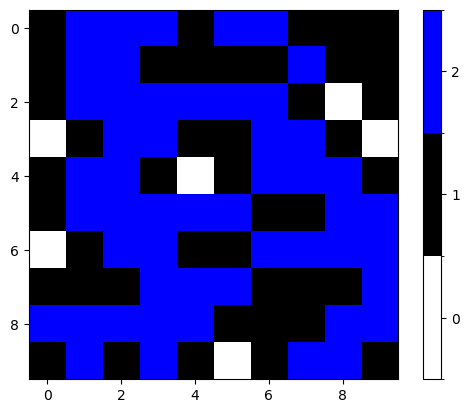

In [205]:
plt.imshow(isopen, cmap=cmap, norm=norm, interpolation='none')
plt.colorbar(ticks=[0, 1, 2])
plt.show()

We can see that this is a percolating matrix since the fluid (represented in blue) has found a continuous path to the bottom.

Let us study the influence of the probability $p$ on the likelihood of matrix percolation.

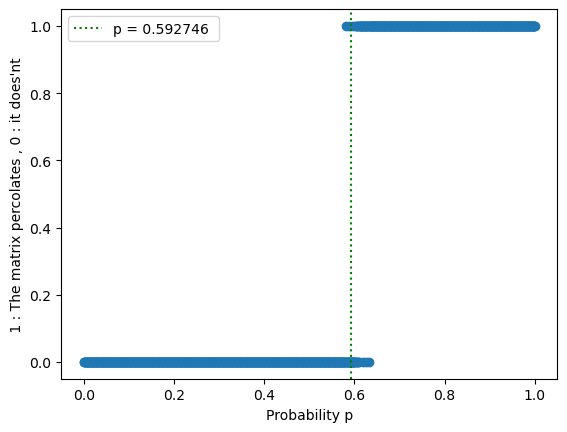

In [210]:
def percolate(isopen) :
    """ Return 1 if the matrix percolate , 0 if not """
    after = fill(isopen)
    for e in after[-1,:]:
        if e == 2 :
            return 1
    return 0
p_n1 = np.linspace(0,1,1000)
l1 = []
for p_1 in p_n1 :
    l1.append(percolate(generate(100,p_1)))
l1 = np.array(l1)
fig,ax = plt.subplots()
ax.scatter(p_n1,l1)
ax.axvline(x= 0.592746, color='green', linestyle=':', label='p = 0.592746 ')
ax.set_xlabel( "Probability p")
ax.set_ylabel(" 1 : The matrix percolates , 0 : it does'nt ")
ax.legend()
    

For a fixed value of $n = 100$, we simulated 1000 matrices with different probabilities $p \in [0,1]$.

We observe that almost all matrices with $p > p_c = 0.592746$ percolated, while almost all others did not. This threshold value $p_c$ is called the critical probability. It is mathematically proven that for large $n$, the probability of percolation in an $n \times n$ matrix exhibits a sharp transition:
$$
\lim_{n \to +\infty} \mathbb{P}(\text{the } n \times n \text{ matrix percolates}) = 
\begin{cases} 
1 & \text{if } p > p_c, \\
0 & \text{if } p < p_c.
\end{cases}
$$
Our simulation with $n = 100$ empirically validates this theoretical result.